In [34]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [35]:
df = pd.read_csv("Best_30_Years_monthly.csv", index_col=0)
df

,PRCP_US1UTWS0009,PRCP_USC00421285,PRCP_USC00421918,TMIN_USC00421918,TMAX_USC00421918,PRCP_USC00422294,TMIN_USC00422294,TMAX_USC00422294,PRCP_USC00422726,PRCP_USC00423335,...,TMAX_USC00429133,PRCP_USC00429560,TMIN_USC00429560,TMAX_USC00429560,PRCP_USW00024126,SNOW_USW00024126,SNWD_USW00024126,TMIN_USW00024126,TMAX_USW00024126,depth
1958-11,3.933333,16.700000,7.800000,-72.700000,85.933333,9.033333,-69.800000,86.866667,19.633333,11.600000,...,78.500000,11.933333,-94.666667,43.933333,9.600000,8.800000,22.033333,-24.533333,99.866667,4195.25
1958-12,6.709677,12.193548,6.870968,-97.645161,67.741935,3.774194,-69.161290,73.129032,2.161290,2.548387,...,70.483871,2.387097,-95.129032,39.838710,4.483871,2.387097,2.419355,-29.774194,76.548387,4195.30
1959-01,12.774194,31.580645,6.666667,-109.451613,31.645161,10.645161,-94.612903,42.709677,9.935484,5.074074,...,37.645161,1.806452,-124.612903,3.741935,13.129032,9.677419,9.774194,-38.548387,59.483871,4195.50
1959-02,17.928571,24.928571,31.571429,-99.678571,37.892857,9.428571,-78.392857,39.392857,20.071429,10.928571,...,31.178571,6.428571,-140.071429,4.642857,12.857143,13.750000,29.928571,-25.000000,69.964286,4195.75
1959-03,8.451613,16.806452,8.322581,-79.903226,89.387097,7.806452,-51.258065,90.290323,8.483871,5.387097,...,76.129032,4.935484,-82.193548,43.096774,6.451613,0.322581,0.000000,-12.709677,116.935484,4195.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988-06,0.600000,0.166667,6.466667,71.433333,280.733333,3.333333,81.900000,289.500000,1.933333,0.866667,...,296.266667,2.966667,51.500000,280.166667,0.266667,0.000000,0.000000,162.900000,322.666667,4208.55
1988-07,1.483871,1.806452,1.741935,88.965517,311.724138,0.258065,107.258065,324.354839,1.225806,0.967742,...,330.612903,0.258065,77.225806,306.225806,0.322581,0.000000,0.000000,187.806452,355.645161,4207.85
1988-08,5.741935,3.161290,5.000000,67.806452,298.064516,0.354839,88.419355,305.032258,5.225806,6.903226,...,313.612903,1.645161,37.677419,285.258065,1.838710,0.000000,0.000000,166.258065,328.225806,4207.15
1988-09,3.300000,1.700000,5.666667,15.966667,233.366667,0.433333,34.400000,244.833333,2.566667,4.133333,...,250.466667,3.500000,-10.766667,220.800000,0.633333,0.000000,0.000000,101.200000,251.400000,4206.65


In [36]:
df.isna().sum().sum()

0

In [37]:
# Split train and test
split_index = int(len(df) *.7)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

In the next cells, I fit the model, remove columns with a high p-value, and repeat. I stopped removing columns when the BIC began to go up again. This happened to be at alpha = .05

In [38]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth'))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     15.21
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           8.79e-44
Time:                        20:16:21   Log-Likelihood:                -453.08
No. Observations:                 251   AIC:                             992.2
Df Residuals:                     208   BIC:                             1144.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4189.6347      1.857   2256.116      0.000    4185.974    4193.296
PRCP_US1UTWS0009     0.0846      0.032      2.648      0.009       0.022       0.148
PRCP_USC00421285    -0.0219      0.024     -0.899      0.370      -0.070       0.026
PRCP_USC00421918     0.0027      0.004      0.763      0.446      -0.004       0.010
TMIN_USC00421918    -0.0353      0.013     -2.651      0.009      -0.062      -0.009
TMAX_USC00421918     0.0347      0.018      1.879      0.062      -0.002       0.071
PRCP_USC00422294    -0.0166      0.045     -0.373      0.709      -0.105       0.071
TMIN_USC00422294     0.0171      0.017      1.010      0.314      -0.016       0.050
TMAX_USC00422294    -0.1491      0.024     -6.146      0.000      -0.197      -0.101
PRCP_USC00422726     0.0084      0.029      0.288      0.774      -0.049       0.066
PRCP_USC00423335    -0.0144      0.045     -0.317      0.751      -0.104       0.075
TMIN_USC00424846     0.0290      0.009      3.064      0.002       0.010       0.048
TMAX_USC00424846    -0.0286      0.019     -1.507      0.133      -0.066       0.009
PRCP_USC00425705     0.0278      0.026      1.082      0.281      -0.023       0.078
TMIN_USC00425705     0.0271      0.017      1.557      0.121      -0.007       0.061
TMAX_USC00425705     0.0175      0.018      0.954      0.341      -0.019       0.054
PRCP_USC00427255    -0.0145      0.025     -0.575      0.566      -0.064       0.035
TMIN_USC00427255    -0.0365      0.014     -2.586      0.010      -0.064      -0.009
TMAX_USC00427255    -0.0169      0.017     -1.020      0.309      -0.049       0.016
PRCP_USC00427576    -0.0347      0.037     -0.938      0.349      -0.108       0.038
TMIN_USC00427576     0.0012      0.015      0.079      0.937      -0.029       0.032
PRCP_USC00428114    -0.0086      0.024     -0.354      0.724      -0.056       0.039
TMIN_USC00428114    -0.0154      0.022     -0.707      0.480      -0.058       0.027
TMAX_USC00428114     0.0014      0.028      0.051      0.959      -0.053       0.056
PRCP_USC00428668    -0.0504      0.020     -2.513      0.013      -0.090      -0.011
PRCP_USC00428741     0.0322      0.040      0.802      0.424      -0.047       0.111
SNOW_USC00428741     0.0114      0.041      0.278      0.781      -0.069       0.092
SNWD_USC00428741     0.0014      0.005      0.276      0.783      -0.009       0.012
TMIN_USC00428741    -0.1054      0.020     -5.161      0.000      -0.146      -0.065
TMAX_USC00428741     0.0559      0.025      2.205      0.029       0.006       0.106
TMIN_USC00428939    -0.0626      0.017     -3.722      0.000      -0.096      -0.029
TMAX_USC00428939     0.0301      0.026      1.165      0.245      -0.021       0.081
PRCP_USC00429133    -0.0334      0.035     -0.943      0.347      -0.103       0.036
TMIN_USC00429133    -0.

In [39]:
dropped_cols = model.pvalues[model.pvalues > .5].index
dropped_cols

Index(['PRCP_USC00422294', 'PRCP_USC00422726', 'PRCP_USC00423335',
       'PRCP_USC00427255', 'TMIN_USC00427576', 'PRCP_USC00428114',
       'TMAX_USC00428114', 'SNOW_USC00428741', 'SNWD_USC00428741',
       'PRCP_USW00024126', 'SNWD_USW00024126', 'TMAX_USW00024126'],
      dtype='object')

In [40]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth').drop(columns=dropped_cols))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     22.28
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           4.41e-51
Time:                        20:16:21   Log-Likelihood:                -454.11
No. Observations:                 251   AIC:                             970.2
Df Residuals:                     220   BIC:                             1080.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4189.2655      1.675   2500.425      0.000    4185.964    4192.567
PRCP_US1UTWS0009     0.0845      0.029      2.882      0.004       0.027       0.142
PRCP_USC00421285    -0.0159      0.019     -0.819      0.414      -0.054       0.022
PRCP_USC00421918     0.0025      0.003      0.750      0.454      -0.004       0.009
TMIN_USC00421918    -0.0363      0.012     -2.921      0.004      -0.061      -0.012
TMAX_USC00421918     0.0346      0.017      2.004      0.046       0.001       0.069
TMIN_USC00422294     0.0176      0.016      1.104      0.271      -0.014       0.049
TMAX_USC00422294    -0.1428      0.021     -6.704      0.000      -0.185      -0.101
TMIN_USC00424846     0.0298      0.009      3.475      0.001       0.013       0.047
TMAX_USC00424846    -0.0313      0.016     -1.987      0.048      -0.062      -0.000
PRCP_USC00425705     0.0224      0.022      1.026      0.306      -0.021       0.065
TMIN_USC00425705     0.0276      0.016      1.678      0.095      -0.005       0.060
TMAX_USC00425705     0.0152      0.017      0.874      0.383      -0.019       0.049
TMIN_USC00427255    -0.0365      0.013     -2.727      0.007      -0.063      -0.010
TMAX_USC00427255    -0.0179      0.015     -1.203      0.230      -0.047       0.011
PRCP_USC00427576    -0.0361      0.032     -1.116      0.265      -0.100       0.028
TMIN_USC00428114    -0.0201      0.020     -1.016      0.311      -0.059       0.019
PRCP_USC00428668    -0.0534      0.019     -2.834      0.005      -0.091      -0.016
PRCP_USC00428741     0.0378      0.024      1.562      0.120      -0.010       0.086
TMIN_USC00428741    -0.1078      0.018     -5.828      0.000      -0.144      -0.071
TMAX_USC00428741     0.0471      0.022      2.110      0.036       0.003       0.091
TMIN_USC00428939    -0.0572      0.015     -3.837      0.000      -0.087      -0.028
TMAX_USC00428939     0.0317      0.017      1.822      0.070      -0.003       0.066
PRCP_USC00429133    -0.0412      0.029     -1.418      0.158      -0.098       0.016
TMIN_USC00429133    -0.0397      0.013     -2.982      0.003      -0.066      -0.013
TMAX_USC00429133     0.1222      0.019      6.327      0.000       0.084       0.160
PRCP_USC00429560    -0.0343      0.030     -1.152      0.250      -0.093       0.024
TMIN_USC00429560     0.0167      0.011      1.530      0.128      -0.005       0.038
TMAX_USC00429560    -0.0129      0.016     -0.817      0.415      -0.044       0.018
SNOW_USW00024126     0.0493      0.026      1.918      0.056      -0.001       0.100
TMIN_USW00024126     0.1626      0.013     12.509      0.000       0.137       0.188
==============================================================================
Omnibus:                        2.885   Durbin-Watson:                   1.018
Prob(Omnibus):                  0.2

In [41]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .3].index)
dropped_cols

Index(['PRCP_USC00421285', 'PRCP_USC00421918', 'PRCP_USC00422294',
       'PRCP_USC00422726', 'PRCP_USC00423335', 'PRCP_USC00425705',
       'PRCP_USC00427255', 'PRCP_USC00428114', 'PRCP_USW00024126',
       'SNOW_USC00428741', 'SNWD_USC00428741', 'SNWD_USW00024126',
       'TMAX_USC00425705', 'TMAX_USC00428114', 'TMAX_USC00429560',
       'TMAX_USW00024126', 'TMIN_USC00427576', 'TMIN_USC00428114'],
      dtype='object')

In [42]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth').drop(columns=dropped_cols))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     27.81
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           2.46e-54
Time:                        20:16:21   Log-Likelihood:                -456.77
No. Observations:                 251   AIC:                             963.5
Df Residuals:                     226   BIC:                             1052.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4189.8636      1.598   2621.168      0.000    4186.714    4193.013
PRCP_US1UTWS0009     0.0768      0.029      2.682      0.008       0.020       0.133
TMIN_USC00421918    -0.0346      0.012     -2.828      0.005      -0.059      -0.011
TMAX_USC00421918     0.0313      0.016      1.914      0.057      -0.001       0.064
TMIN_USC00422294     0.0191      0.016      1.210      0.228      -0.012       0.050
TMAX_USC00422294    -0.1461      0.019     -7.843      0.000      -0.183      -0.109
TMIN_USC00424846     0.0275      0.008      3.343      0.001       0.011       0.044
TMAX_USC00424846    -0.0348      0.014     -2.525      0.012      -0.062      -0.008
TMIN_USC00425705     0.0343      0.016      2.204      0.029       0.004       0.065
TMIN_USC00427255    -0.0427      0.013     -3.284      0.001      -0.068      -0.017
TMAX_USC00427255    -0.0140      0.014     -0.966      0.335      -0.042       0.015
PRCP_USC00427576    -0.0353      0.031     -1.145      0.254      -0.096       0.025
PRCP_USC00428668    -0.0531      0.018     -2.879      0.004      -0.089      -0.017
PRCP_USC00428741     0.0367      0.023      1.578      0.116      -0.009       0.083
TMIN_USC00428741    -0.1098      0.018     -6.260      0.000      -0.144      -0.075
TMAX_USC00428741     0.0533      0.021      2.487      0.014       0.011       0.096
TMIN_USC00428939    -0.0617      0.013     -4.890      0.000      -0.087      -0.037
TMAX_USC00428939     0.0266      0.017      1.588      0.114      -0.006       0.059
PRCP_USC00429133    -0.0360      0.026     -1.395      0.165      -0.087       0.015
TMIN_USC00429133    -0.0409      0.013     -3.185      0.002      -0.066      -0.016
TMAX_USC00429133     0.1245      0.019      6.565      0.000       0.087       0.162
PRCP_USC00429560    -0.0182      0.028     -0.643      0.521      -0.074       0.038
TMIN_USC00429560     0.0124      0.010      1.232      0.219      -0.007       0.032
SNOW_USW00024126     0.0488      0.025      1.985      0.048       0.000       0.097
TMIN_USW00024126     0.1602      0.013     12.680      0.000       0.135       0.185
==============================================================================
Omnibus:                        3.363   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.011
Skew:                          -0.226   Prob(JB):                        0.222
Kurtosis:                       3.289   Cond. No.                     8.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+03. This might indicate that there are
strong multicollinearity or other numerical probl

In [43]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .2].index)
dropped_cols

Index(['PRCP_USC00421285', 'PRCP_USC00421918', 'PRCP_USC00422294',
       'PRCP_USC00422726', 'PRCP_USC00423335', 'PRCP_USC00425705',
       'PRCP_USC00427255', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00429560', 'PRCP_USW00024126', 'SNOW_USC00428741',
       'SNWD_USC00428741', 'SNWD_USW00024126', 'TMAX_USC00425705',
       'TMAX_USC00427255', 'TMAX_USC00428114', 'TMAX_USC00429560',
       'TMAX_USW00024126', 'TMIN_USC00422294', 'TMIN_USC00427576',
       'TMIN_USC00428114', 'TMIN_USC00429560'],
      dtype='object')

In [44]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth').drop(columns=dropped_cols))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     34.55
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           9.72e-57
Time:                        20:16:21   Log-Likelihood:                -460.37
No. Observations:                 251   AIC:                             960.7
Df Residuals:                     231   BIC:                             1031.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4189.1192      1.477   2835.892      0.000    4186.209    4192.030
PRCP_US1UTWS0009     0.0667      0.028      2.361      0.019       0.011       0.122
TMIN_USC00421918    -0.0292      0.012     -2.489      0.014      -0.052      -0.006
TMAX_USC00421918     0.0335      0.016      2.130      0.034       0.003       0.065
TMAX_USC00422294    -0.1487      0.019     -8.032      0.000      -0.185      -0.112
TMIN_USC00424846     0.0264      0.008      3.226      0.001       0.010       0.042
TMAX_USC00424846    -0.0348      0.013     -2.586      0.010      -0.061      -0.008
TMIN_USC00425705     0.0544      0.012      4.388      0.000       0.030       0.079
TMIN_USC00427255    -0.0459      0.011     -4.012      0.000      -0.069      -0.023
PRCP_USC00428668    -0.0505      0.018     -2.746      0.007      -0.087      -0.014
PRCP_USC00428741     0.0291      0.020      1.457      0.147      -0.010       0.068
TMIN_USC00428741    -0.1082      0.017     -6.284      0.000      -0.142      -0.074
TMAX_USC00428741     0.0563      0.020      2.876      0.004       0.018       0.095
TMIN_USC00428939    -0.0681      0.012     -5.508      0.000      -0.093      -0.044
TMAX_USC00428939     0.0134      0.016      0.852      0.395      -0.018       0.045
PRCP_USC00429133    -0.0463      0.024     -1.922      0.056      -0.094       0.001
TMIN_USC00429133    -0.0317      0.012     -2.686      0.008      -0.055      -0.008
TMAX_USC00429133     0.1231      0.019      6.515      0.000       0.086       0.160
SNOW_USW00024126     0.0451      0.024      1.895      0.059      -0.002       0.092
TMIN_USW00024126     0.1625      0.012     13.741      0.000       0.139       0.186
==============================================================================
Omnibus:                        2.246   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                1.909
Skew:                          -0.186   Prob(JB):                        0.385
Kurtosis:                       3.209   Cond. No.                     7.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .1].index)
dropped_cols

Index(['PRCP_USC00421285', 'PRCP_USC00421918', 'PRCP_USC00422294',
       'PRCP_USC00422726', 'PRCP_USC00423335', 'PRCP_USC00425705',
       'PRCP_USC00427255', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00428741', 'PRCP_USC00429560', 'PRCP_USW00024126',
       'SNOW_USC00428741', 'SNWD_USC00428741', 'SNWD_USW00024126',
       'TMAX_USC00425705', 'TMAX_USC00427255', 'TMAX_USC00428114',
       'TMAX_USC00428939', 'TMAX_USC00429560', 'TMAX_USW00024126',
       'TMIN_USC00422294', 'TMIN_USC00427576', 'TMIN_USC00428114',
       'TMIN_USC00429560'],
      dtype='object')

In [46]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth').drop(columns=dropped_cols))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     38.23
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.19e-57
Time:                        20:16:21   Log-Likelihood:                -462.09
No. Observations:                 251   AIC:                             960.2
Df Residuals:                     233   BIC:                             1024.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4189.1781      1.480   2830.682      0.000    4186.262    4192.094
PRCP_US1UTWS0009     0.0760      0.028      2.745      0.007       0.021       0.131
TMIN_USC00421918    -0.0257      0.012     -2.223      0.027      -0.049      -0.003
TMAX_USC00421918     0.0366      0.015      2.386      0.018       0.006       0.067
TMAX_USC00422294    -0.1470      0.018     -7.995      0.000      -0.183      -0.111
TMIN_USC00424846     0.0256      0.008      3.162      0.002       0.010       0.042
TMAX_USC00424846    -0.0382      0.013     -2.857      0.005      -0.064      -0.012
TMIN_USC00425705     0.0545      0.012      4.411      0.000       0.030       0.079
TMIN_USC00427255    -0.0458      0.011     -4.007      0.000      -0.068      -0.023
PRCP_USC00428668    -0.0471      0.018     -2.577      0.011      -0.083      -0.011
TMIN_USC00428741    -0.1136      0.017     -6.841      0.000      -0.146      -0.081
TMAX_USC00428741     0.0672      0.016      4.210      0.000       0.036       0.099
TMIN_USC00428939    -0.0642      0.012     -5.323      0.000      -0.088      -0.040
PRCP_USC00429133    -0.0395      0.023     -1.697      0.091      -0.085       0.006
TMIN_USC00429133    -0.0325      0.012     -2.808      0.005      -0.055      -0.010
TMAX_USC00429133     0.1265      0.019      6.813      0.000       0.090       0.163
SNOW_USW00024126     0.0552      0.022      2.460      0.015       0.011       0.099
TMIN_USW00024126     0.1609      0.012     13.746      0.000       0.138       0.184
==============================================================================
Omnibus:                        3.261   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.903
Skew:                          -0.236   Prob(JB):                        0.234
Kurtosis:                       3.233   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .07].index)
dropped_cols

Index(['PRCP_USC00421285', 'PRCP_USC00421918', 'PRCP_USC00422294',
       'PRCP_USC00422726', 'PRCP_USC00423335', 'PRCP_USC00425705',
       'PRCP_USC00427255', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00428741', 'PRCP_USC00429133', 'PRCP_USC00429560',
       'PRCP_USW00024126', 'SNOW_USC00428741', 'SNWD_USC00428741',
       'SNWD_USW00024126', 'TMAX_USC00425705', 'TMAX_USC00427255',
       'TMAX_USC00428114', 'TMAX_USC00428939', 'TMAX_USC00429560',
       'TMAX_USW00024126', 'TMIN_USC00422294', 'TMIN_USC00427576',
       'TMIN_USC00428114', 'TMIN_USC00429560'],
      dtype='object')

In [48]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth').drop(columns=dropped_cols))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     40.12
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           7.45e-58
Time:                        20:16:21   Log-Likelihood:                -463.63
No. Observations:                 251   AIC:                             961.3
Df Residuals:                     234   BIC:                             1021.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4188.8171      1.470   2848.753      0.000    4185.920    4191.714
PRCP_US1UTWS0009     0.0585      0.026      2.267      0.024       0.008       0.109
TMIN_USC00421918    -0.0278      0.012     -2.409      0.017      -0.051      -0.005
TMAX_USC00421918     0.0327      0.015      2.145      0.033       0.003       0.063
TMAX_USC00422294    -0.1417      0.018     -7.790      0.000      -0.178      -0.106
TMIN_USC00424846     0.0263      0.008      3.239      0.001       0.010       0.042
TMAX_USC00424846    -0.0393      0.013     -2.935      0.004      -0.066      -0.013
TMIN_USC00425705     0.0538      0.012      4.336      0.000       0.029       0.078
TMIN_USC00427255    -0.0447      0.011     -3.906      0.000      -0.067      -0.022
PRCP_USC00428668    -0.0516      0.018     -2.839      0.005      -0.087      -0.016
TMIN_USC00428741    -0.1118      0.017     -6.720      0.000      -0.145      -0.079
TMAX_USC00428741     0.0668      0.016      4.170      0.000       0.035       0.098
TMIN_USC00428939    -0.0670      0.012     -5.595      0.000      -0.091      -0.043
TMIN_USC00429133    -0.0321      0.012     -2.759      0.006      -0.055      -0.009
TMAX_USC00429133     0.1269      0.019      6.811      0.000       0.090       0.164
SNOW_USW00024126     0.0562      0.023      2.496      0.013       0.012       0.101
TMIN_USW00024126     0.1617      0.012     13.772      0.000       0.139       0.185
==============================================================================
Omnibus:                        4.421   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                4.103
Skew:                          -0.262   Prob(JB):                        0.129
Kurtosis:                       3.342   Cond. No.                     6.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
dropped_cols = dropped_cols.union(model.pvalues[model.pvalues > .05].index)
dropped_cols

Index(['PRCP_USC00421285', 'PRCP_USC00421918', 'PRCP_USC00422294',
       'PRCP_USC00422726', 'PRCP_USC00423335', 'PRCP_USC00425705',
       'PRCP_USC00427255', 'PRCP_USC00427576', 'PRCP_USC00428114',
       'PRCP_USC00428741', 'PRCP_USC00429133', 'PRCP_USC00429560',
       'PRCP_USW00024126', 'SNOW_USC00428741', 'SNWD_USC00428741',
       'SNWD_USW00024126', 'TMAX_USC00425705', 'TMAX_USC00427255',
       'TMAX_USC00428114', 'TMAX_USC00428939', 'TMAX_USC00429560',
       'TMAX_USW00024126', 'TMIN_USC00422294', 'TMIN_USC00427576',
       'TMIN_USC00428114', 'TMIN_USC00429560'],
      dtype='object')

In [50]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
dropped_cols = dropped_cols.union(to_drop)
to_drop

['PRCP_USC00421285',
 'TMAX_USC00421918',
 'TMIN_USC00422294',
 'TMAX_USC00422294',
 'PRCP_USC00423335',
 'TMIN_USC00424846',
 'TMAX_USC00424846',
 'PRCP_USC00425705',
 'TMIN_USC00425705',
 'TMAX_USC00425705',
 'TMIN_USC00427255',
 'TMAX_USC00427255',
 'PRCP_USC00427576',
 'TMIN_USC00427576',
 'PRCP_USC00428114',
 'TMIN_USC00428114',
 'TMAX_USC00428114',
 'PRCP_USC00428668',
 'PRCP_USC00428741',
 'TMIN_USC00428741',
 'TMAX_USC00428741',
 'TMIN_USC00428939',
 'TMAX_USC00428939',
 'PRCP_USC00429133',
 'TMIN_USC00429133',
 'TMAX_USC00429133',
 'TMIN_USC00429560',
 'TMAX_USC00429560',
 'PRCP_USW00024126',
 'SNOW_USW00024126',
 'SNWD_USW00024126',
 'TMIN_USW00024126',
 'TMAX_USW00024126']

In [51]:
model = sm.OLS(train.depth, sm.add_constant(train.drop(columns='depth').drop(columns=dropped_cols))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5334
Date:                Mon, 22 Mar 2021   Prob (F-statistic):              0.587
Time:                        20:16:21   Log-Likelihood:                -628.75
No. Observations:                 251   AIC:                             1263.
Df Residuals:                     248   BIC:                             1274.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4196.4219      0.301    1.4e+04      0.000    4195.830    4197.014
PRCP_US1UTWS0009    -0.0003      0.021     -0.016      0.987      -0.042       0.042
TMIN_USC00421918     0.0025      0.003      1.009      0.314      -0.002       0.008
==============================================================================
Omnibus:                      275.649   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.292
Skew:                           0.181   Prob(JB):                     6.47e-05
Kurtosis:                       1.691   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:title={'center':'OLS Predictions. BIC = 1021'}, xlabel='Dates', ylabel='Lake Depth (ft)'>

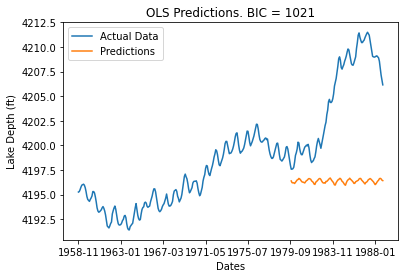

In [52]:
important_cols = list(model.params[1:].index)
predictions = model.predict(sm.add_constant(test[important_cols]))
filled_predictions = df.depth.copy()
filled_predictions[:-len(predictions)] = None
filled_predictions[-len(predictions):] = predictions

df.depth.plot(label="Actual Data", legend=True, title="OLS Predictions. BIC = 1021", xlabel="Dates", ylabel="Lake Depth (ft)")
filled_predictions.plot(label="Predictions", legend=True)

In [53]:
important_cols

['PRCP_US1UTWS0009', 'TMIN_USC00421918']